# Bode Plot Example: RC Filter Analysis

This notebook demonstrates how to create Bode plots for RC filters using Python. We'll analyze both low-pass and high-pass RC filter configurations.

## Overview

A Bode plot is a graph showing the frequency response of a linear time-invariant system. It consists of two plots:
- **Magnitude plot**: Shows how the amplitude changes with frequency (in dB)
- **Phase plot**: Shows how the phase changes with frequency (in degrees)



## Filter Transfer Functions

### Low-pass Filter
The transfer function for a low-pass RC filter is:
$$H_{lp}(jω) = \frac{1}{1 + jωRC}$$

### High-pass Filter  
The transfer function for a high-pass RC filter is:
$$H_{hp}(jω) = \frac{jωRC}{1 + jωRC}$$

At the cutoff frequency, both filters have a magnitude of -3 dB (≈ 0.707 of the input amplitude).

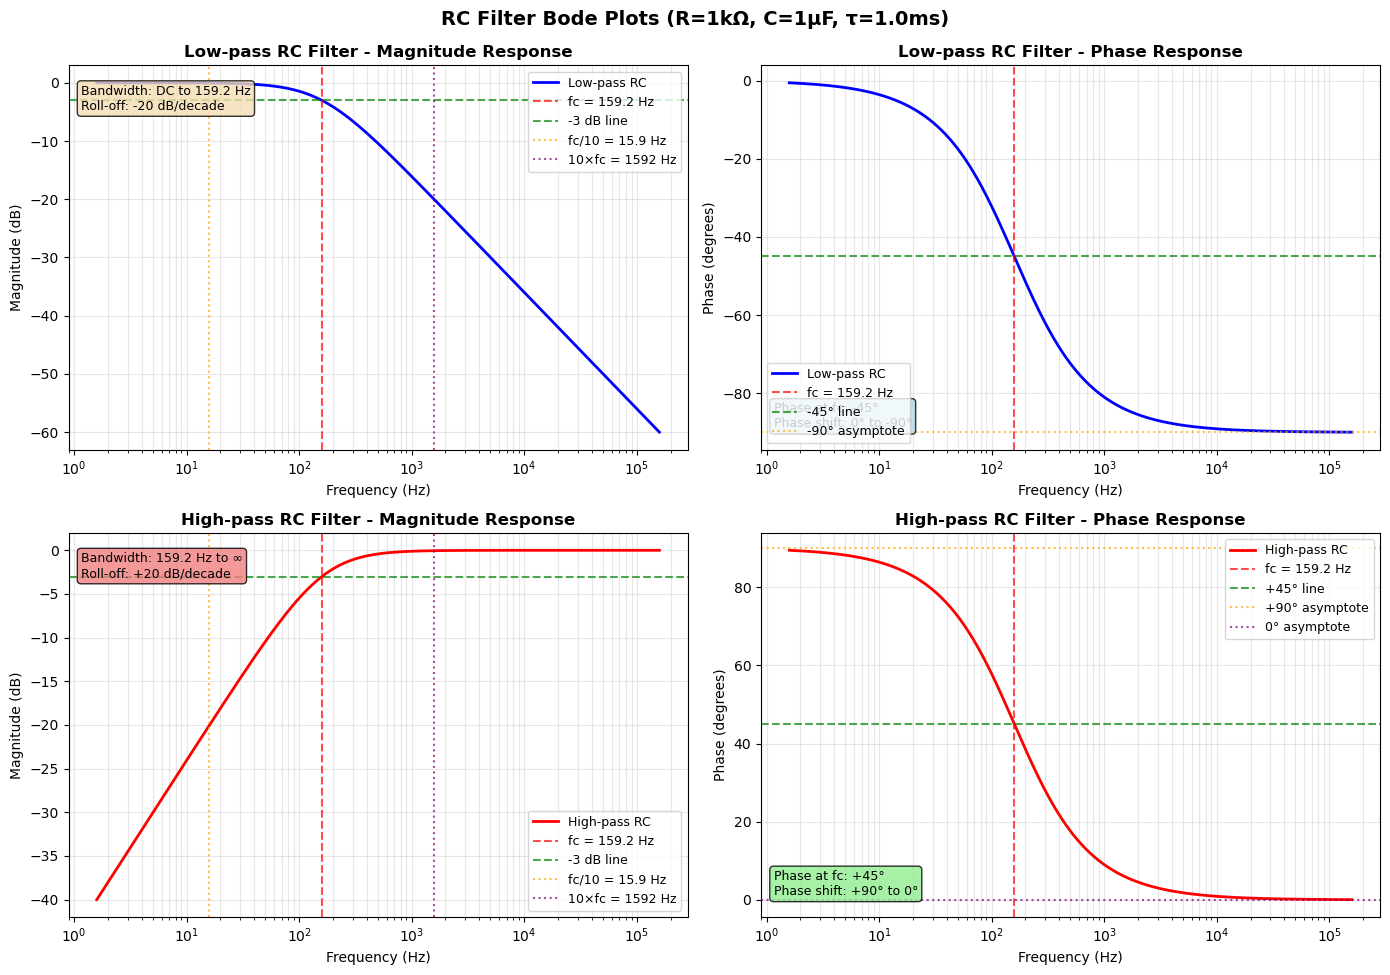

In [3]:
import numpy as np
import matplotlib.pyplot as plt

'''
RC Filter Parameters

For this example, we use:
- Resistance (R) = 1 kΩ
- Capacitance (C) = 1 μF
- Time constant (τ) = RC = 1 ms
- Cutoff frequency (fc) = 1/(2πRC) ≈ 159.15 Hz
'''




# Define RC parameters
R = 1e3      # 1 kOhm
C = 1e-6     # 1 uF
tau = R * C
wc = 1 / tau  # cutoff rad/s
fc = wc / (2 * np.pi)

# Frequency range (log-spaced)
w = np.logspace(1, 6, 1000)  # rad/s
s = 1j * w

# Low-pass transfer function H_lp = 1 / (1 + j w RC)
H_lp = 1 / (1 + s * tau)

# High-pass transfer function H_hp = (j w RC) / (1 + j w RC)
H_hp = (s * tau) / (1 + s * tau)

# Calculate additional parameters for enhanced plots
f_3dB = fc  # -3dB frequency (same as cutoff frequency)
f_decade_below = fc / 10  # One decade below cutoff
f_decade_above = fc * 10   # One decade above cutoff

# --- Create 2x2 subplot layout ---
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Calculate magnitude and phase for both filters
mag_lp_db = 20 * np.log10(np.abs(H_lp))
phase_lp_deg = np.angle(H_lp, deg=True)
mag_hp_db = 20 * np.log10(np.abs(H_hp))
phase_hp_deg = np.angle(H_hp, deg=True)

# Low-pass magnitude plot (top-left)
ax1.semilogx(w/(2*np.pi), mag_lp_db, 'b-', linewidth=2, label='Low-pass RC')
ax1.axvline(fc, color='r', linestyle='--', alpha=0.7, label=f'fc = {fc:.1f} Hz')
ax1.axhline(-3, color='g', linestyle='--', alpha=0.7, label='-3 dB line')
ax1.axvline(f_decade_below, color='orange', linestyle=':', alpha=0.7, label=f'fc/10 = {f_decade_below:.1f} Hz')
ax1.axvline(f_decade_above, color='purple', linestyle=':', alpha=0.7, label=f'10×fc = {f_decade_above:.0f} Hz')
ax1.set_title("Low-pass RC Filter - Magnitude Response", fontweight='bold')
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Magnitude (dB)")
ax1.grid(True, which='both', alpha=0.3)
ax1.legend(loc='upper right', fontsize=9)
ax1.text(0.02, 0.95, f'Bandwidth: DC to {fc:.1f} Hz\nRoll-off: -20 dB/decade', 
         transform=ax1.transAxes, verticalalignment='top', fontsize=9, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Low-pass phase plot (top-right)
ax2.semilogx(w/(2*np.pi), phase_lp_deg, 'b-', linewidth=2, label='Low-pass RC')
ax2.axvline(fc, color='r', linestyle='--', alpha=0.7, label=f'fc = {fc:.1f} Hz')
ax2.axhline(-45, color='g', linestyle='--', alpha=0.7, label='-45° line')
ax2.axhline(-90, color='orange', linestyle=':', alpha=0.7, label='-90° asymptote')
ax2.set_title("Low-pass RC Filter - Phase Response", fontweight='bold')
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Phase (degrees)")
ax2.grid(True, which='both', alpha=0.3)
ax2.legend(loc='lower left', fontsize=9)
ax2.text(0.02, 0.05, f'Phase at fc: -45°\nPhase shift: 0° to -90°', 
         transform=ax2.transAxes, verticalalignment='bottom', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# High-pass magnitude plot (bottom-left)
ax3.semilogx(w/(2*np.pi), mag_hp_db, 'r-', linewidth=2, label='High-pass RC')
ax3.axvline(fc, color='r', linestyle='--', alpha=0.7, label=f'fc = {fc:.1f} Hz')
ax3.axhline(-3, color='g', linestyle='--', alpha=0.7, label='-3 dB line')
ax3.axvline(f_decade_below, color='orange', linestyle=':', alpha=0.7, label=f'fc/10 = {f_decade_below:.1f} Hz')
ax3.axvline(f_decade_above, color='purple', linestyle=':', alpha=0.7, label=f'10×fc = {f_decade_above:.0f} Hz')
ax3.set_title("High-pass RC Filter - Magnitude Response", fontweight='bold')
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Magnitude (dB)")
ax3.grid(True, which='both', alpha=0.3)
ax3.legend(loc='lower right', fontsize=9)
ax3.text(0.02, 0.95, f'Bandwidth: {fc:.1f} Hz to ∞\nRoll-off: +20 dB/decade', 
         transform=ax3.transAxes, verticalalignment='top', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# High-pass phase plot (bottom-right)
ax4.semilogx(w/(2*np.pi), phase_hp_deg, 'r-', linewidth=2, label='High-pass RC')
ax4.axvline(fc, color='r', linestyle='--', alpha=0.7, label=f'fc = {fc:.1f} Hz')
ax4.axhline(45, color='g', linestyle='--', alpha=0.7, label='+45° line')
ax4.axhline(90, color='orange', linestyle=':', alpha=0.7, label='+90° asymptote')
ax4.axhline(0, color='purple', linestyle=':', alpha=0.7, label='0° asymptote')
ax4.set_title("High-pass RC Filter - Phase Response", fontweight='bold')
ax4.set_xlabel("Frequency (Hz)")
ax4.set_ylabel("Phase (degrees)")
ax4.grid(True, which='both', alpha=0.3)
ax4.legend(loc='upper right', fontsize=9)
ax4.text(0.02, 0.05, f'Phase at fc: +45°\nPhase shift: +90° to 0°', 
         transform=ax4.transAxes, verticalalignment='bottom', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Adjust layout and show
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at top for main title
plt.suptitle(f'RC Filter Bode Plots (R={R/1e3:.0f}kΩ, C={C*1e6:.0f}μF, τ={tau*1e3:.1f}ms)', 
             fontsize=14, fontweight='bold', y=0.97)
plt.show()


## Second-Order System Analysis

Second-order systems are fundamental in control theory and signal processing. They exhibit more complex behavior than first-order systems, including potential resonance and overshoot characteristics.

### RLC Circuit: A Classic Analog Harmonic System

The **RLC circuit** is one of the most important examples of a second-order harmonic system in analog electronics. It consists of:
- **R**: Resistance (Ω) - provides damping
- **L**: Inductance (H) - stores magnetic energy
- **C**: Capacitance (F) - stores electric energy

#### Series RLC Circuit Transfer Function

For a series RLC circuit with voltage input and capacitor voltage output:
$$H(s) = \frac{1/LC}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$$

This can be rewritten in standard second-order form as:
$$H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

Where the **natural frequency** and **damping ratio** are:
$$\omega_n = \frac{1}{\sqrt{LC}} \quad \text{and} \quad \zeta = \frac{R}{2}\sqrt{\frac{C}{L}}$$

### Physical Interpretation in RLC Circuits

- **Natural frequency (ωₙ)**: The resonant frequency determined by L and C values
- **Damping ratio (ζ)**: Controlled by resistance R
  - **Low R (ζ < 0.707)**: Underdamped → Sharp resonance peak, ringing
  - **Critical R (ζ = 0.707)**: Critically damped → Fastest response without overshoot
  - **High R (ζ > 1)**: Overdamped → No resonance, slow response

### Damping Ratio Effects

The damping ratio determines the system's behavior:
- **ζ > 1**: Overdamped (no oscillation, slow response)
- **ζ = 1**: Critically damped (fastest response without overshoot)
- **0 < ζ < 1**: Underdamped (oscillatory response with overshoot)
- **ζ = 0**: Undamped (pure oscillation at natural frequency)

### Key Frequencies

- **Natural frequency (ωₙ)**: The frequency at which the system naturally oscillates
- **Resonant frequency (ωᵣ)**: ωᵣ = ωₙ√(1 - 2ζ²) for ζ < 0.707
- **Peak magnitude**: Occurs at resonant frequency for underdamped systems


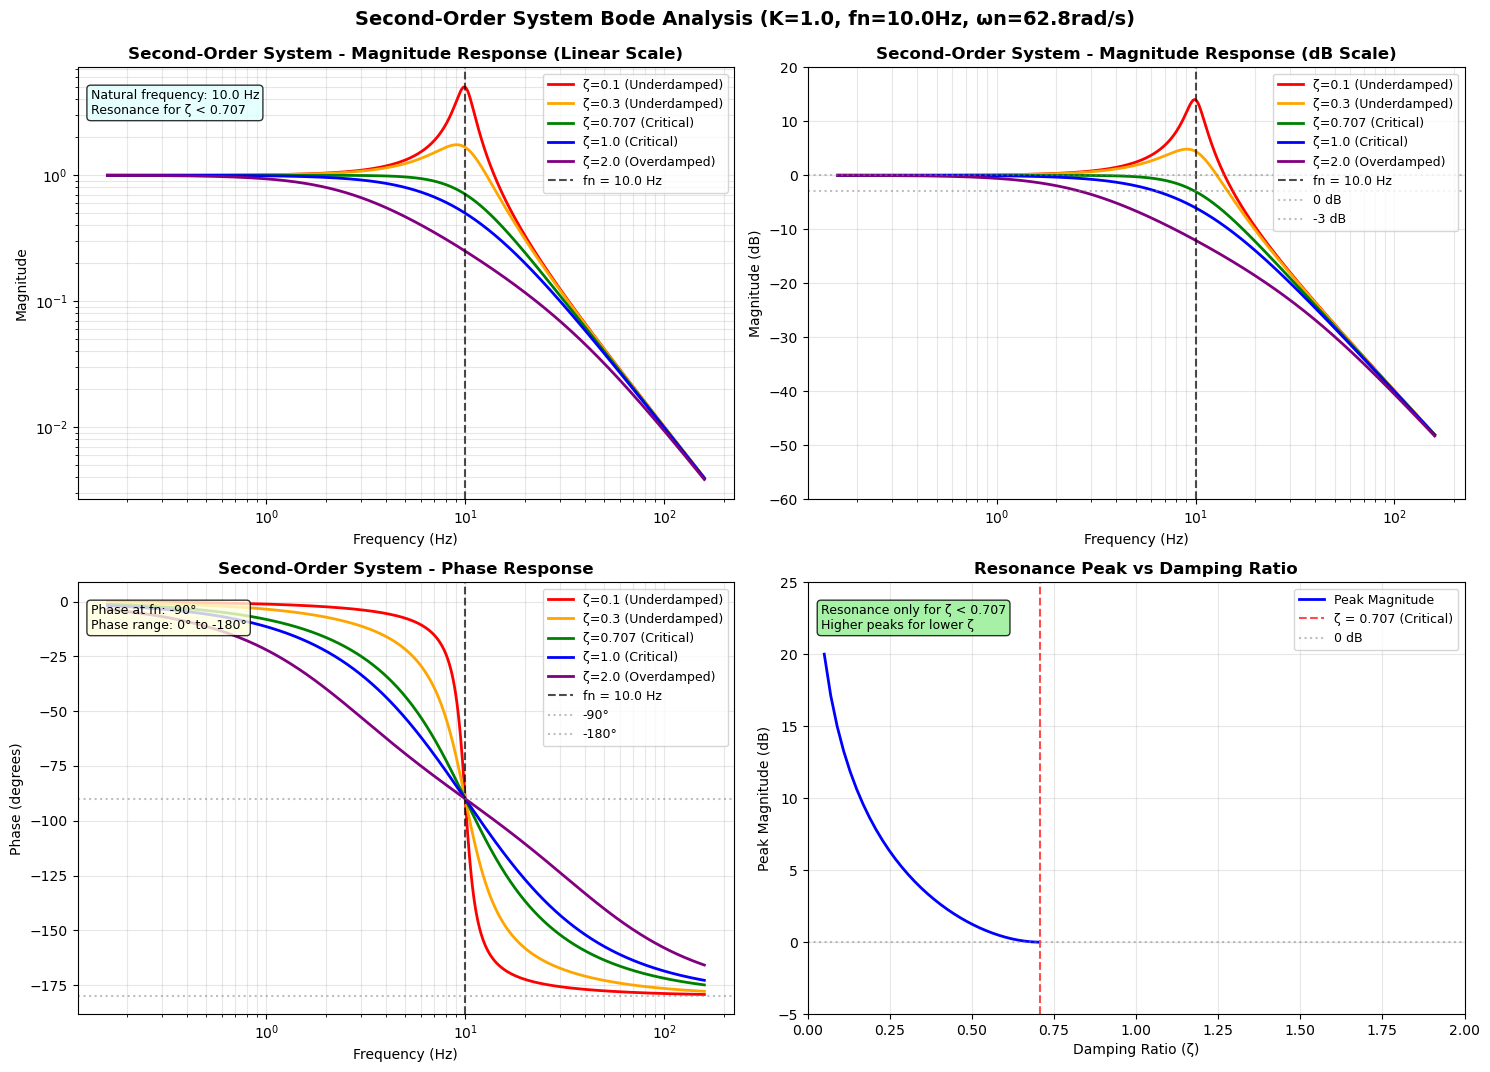

Resonant Frequency Analysis:
ζ =  0.1: Resonant freq =   9.90 Hz, Peak magnitude =  14.0 dB
ζ =  0.3: Resonant freq =   9.06 Hz, Peak magnitude =   4.8 dB
ζ =  0.7: Resonant freq =   0.17 Hz, Peak magnitude =   0.0 dB
ζ =  1.0: No resonance (overdamped/critically damped)
ζ =  2.0: No resonance (overdamped/critically damped)


In [4]:
# Second-Order System Parameters
K = 1.0          # DC gain
wn = 2 * np.pi * 10  # Natural frequency = 10 Hz
fn = wn / (2 * np.pi)  # Natural frequency in Hz

# Different damping ratios to analyze
zeta_values = [0.1, 0.3, 0.707, 1.0, 2.0]
zeta_labels = ['ζ=0.1 (Underdamped)', 'ζ=0.3 (Underdamped)', 'ζ=0.707 (Critical)', 'ζ=1.0 (Critical)', 'ζ=2.0 (Overdamped)']
colors = ['red', 'orange', 'green', 'blue', 'purple']

# Frequency range for second-order analysis
w_2nd = np.logspace(0, 3, 1000)  # 1 to 1000 rad/s
s_2nd = 1j * w_2nd

# Calculate transfer functions for different damping ratios
H_2nd = {}
for zeta in zeta_values:
    H_2nd[zeta] = (K * wn**2) / (s_2nd**2 + 2*zeta*wn*s_2nd + wn**2)

# --- Create 2x2 subplot layout for second-order analysis ---
fig2, ((ax1_2nd, ax2_2nd), (ax3_2nd, ax4_2nd)) = plt.subplots(2, 2, figsize=(15, 11))

# Magnitude plots - Linear scale (top-left)
for i, zeta in enumerate(zeta_values):
    mag_linear = np.abs(H_2nd[zeta])
    ax1_2nd.loglog(w_2nd/(2*np.pi), mag_linear, color=colors[i], linewidth=2, label=zeta_labels[i])

ax1_2nd.axvline(fn, color='black', linestyle='--', alpha=0.7, label=f'fn = {fn:.1f} Hz')
ax1_2nd.set_title("Second-Order System - Magnitude Response (Linear Scale)", fontweight='bold')
ax1_2nd.set_xlabel("Frequency (Hz)")
ax1_2nd.set_ylabel("Magnitude")
ax1_2nd.grid(True, which='both', alpha=0.3)
ax1_2nd.legend(loc='upper right', fontsize=9)
ax1_2nd.text(0.02, 0.95, f'Natural frequency: {fn:.1f} Hz\nResonance for ζ < 0.707', 
         transform=ax1_2nd.transAxes, verticalalignment='top', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

# Magnitude plots - dB scale (top-right)
for i, zeta in enumerate(zeta_values):
    mag_db = 20 * np.log10(np.abs(H_2nd[zeta]))
    ax2_2nd.semilogx(w_2nd/(2*np.pi), mag_db, color=colors[i], linewidth=2, label=zeta_labels[i])

ax2_2nd.axvline(fn, color='black', linestyle='--', alpha=0.7, label=f'fn = {fn:.1f} Hz')
ax2_2nd.axhline(0, color='gray', linestyle=':', alpha=0.5, label='0 dB')
ax2_2nd.axhline(-3, color='gray', linestyle=':', alpha=0.5, label='-3 dB')
ax2_2nd.set_title("Second-Order System - Magnitude Response (dB Scale)", fontweight='bold')
ax2_2nd.set_xlabel("Frequency (Hz)")
ax2_2nd.set_ylabel("Magnitude (dB)")
ax2_2nd.grid(True, which='both', alpha=0.3)
ax2_2nd.legend(loc='upper right', fontsize=9)
ax2_2nd.set_ylim(-60, 20)

# Phase plots (bottom-left)
for i, zeta in enumerate(zeta_values):
    phase_deg = np.angle(H_2nd[zeta], deg=True)
    ax3_2nd.semilogx(w_2nd/(2*np.pi), phase_deg, color=colors[i], linewidth=2, label=zeta_labels[i])

ax3_2nd.axvline(fn, color='black', linestyle='--', alpha=0.7, label=f'fn = {fn:.1f} Hz')
ax3_2nd.axhline(-90, color='gray', linestyle=':', alpha=0.5, label='-90°')
ax3_2nd.axhline(-180, color='gray', linestyle=':', alpha=0.5, label='-180°')
ax3_2nd.set_title("Second-Order System - Phase Response", fontweight='bold')
ax3_2nd.set_xlabel("Frequency (Hz)")
ax3_2nd.set_ylabel("Phase (degrees)")
ax3_2nd.grid(True, which='both', alpha=0.3)
ax3_2nd.legend(loc='upper right', fontsize=9)
ax3_2nd.text(0.02, 0.95, f'Phase at fn: -90°\nPhase range: 0° to -180°', 
         transform=ax3_2nd.transAxes, verticalalignment='top', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Resonance analysis (bottom-right)
zeta_range = np.linspace(0.05, 2.0, 100)
peak_magnitude = []
resonant_freq = []

for zeta in zeta_range:
    if zeta < 1/np.sqrt(2):  # Resonance occurs only for ζ < 0.707
        wr = wn * np.sqrt(1 - 2*zeta**2)  # Resonant frequency
        Mp = 1 / (2*zeta*np.sqrt(1 - zeta**2))  # Peak magnitude
        resonant_freq.append(wr/(2*np.pi))
        peak_magnitude.append(20*np.log10(Mp))
    else:
        resonant_freq.append(np.nan)
        peak_magnitude.append(np.nan)

ax4_2nd.plot(zeta_range, peak_magnitude, 'b-', linewidth=2, label='Peak Magnitude')
ax4_2nd.axvline(1/np.sqrt(2), color='red', linestyle='--', alpha=0.7, label='ζ = 0.707 (Critical)')
ax4_2nd.axhline(0, color='gray', linestyle=':', alpha=0.5, label='0 dB')
ax4_2nd.set_title("Resonance Peak vs Damping Ratio", fontweight='bold')
ax4_2nd.set_xlabel("Damping Ratio (ζ)")
ax4_2nd.set_ylabel("Peak Magnitude (dB)")
ax4_2nd.grid(True, alpha=0.3)
ax4_2nd.legend(loc='upper right', fontsize=9)
ax4_2nd.set_xlim(0, 2)
ax4_2nd.set_ylim(-5, 25)
ax4_2nd.text(0.02, 0.95, f'Resonance only for ζ < 0.707\nHigher peaks for lower ζ', 
         transform=ax4_2nd.transAxes, verticalalignment='top', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Adjust layout and show
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f'Second-Order System Bode Analysis (K={K}, fn={fn:.1f}Hz, ωn={wn:.1f}rad/s)', 
             fontsize=14, fontweight='bold', y=0.97)
plt.show()

# Print resonant frequencies for underdamped cases
print("Resonant Frequency Analysis:")
print("="*50)
for i, zeta in enumerate(zeta_values):
    if zeta < 1/np.sqrt(2):
        wr = wn * np.sqrt(1 - 2*zeta**2)
        fr = wr / (2*np.pi)
        Mp = 1 / (2*zeta*np.sqrt(1 - zeta**2))
        Mp_dB = 20*np.log10(Mp)
        print(f"ζ = {zeta:4.1f}: Resonant freq = {fr:6.2f} Hz, Peak magnitude = {Mp_dB:5.1f} dB")
    else:
        print(f"ζ = {zeta:4.1f}: No resonance (overdamped/critically damped)")